In [ ]:
# load libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train= pd.read_csv("newtrain.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test = pd.read_csv("newtest.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP0138569,Male,Yes,0,Not Graduate,No,2600,1911,116.0,360.0,0.0,Semiurban
1,LP0114279,Female,Yes,2,Not Graduate,No,3365,1917,112.0,360.0,0.0,Rural
2,LP0127727,Male,Yes,1,Graduate,NaN,3717,2925,151.0,360.0,NaN,Semiurban
3,LP0122697,Male,Yes,0,Graduate,Yes,9560,0,191.0,360.0,1.0,Semiurban
4,LP0118029,Male,Yes,0,Graduate,No,2799,2253,122.0,360.0,1.0,Semiurban


In [ ]:
train_original1=train.copy()
test_original1=test.copy()

# Understanding the Data

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train.shape

(87978, 13)

In [ ]:
test.shape

(14985, 12)

In [ ]:
train['Loan_Status'].value_counts()

Y    66051
N    21927
Name: Loan_Status, dtype: int64

In [ ]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.750767
N    0.249233
Name: Loan_Status, dtype: float64

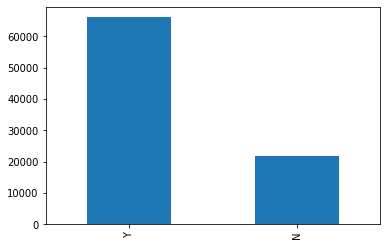

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

# Independent Variable (Categorical)

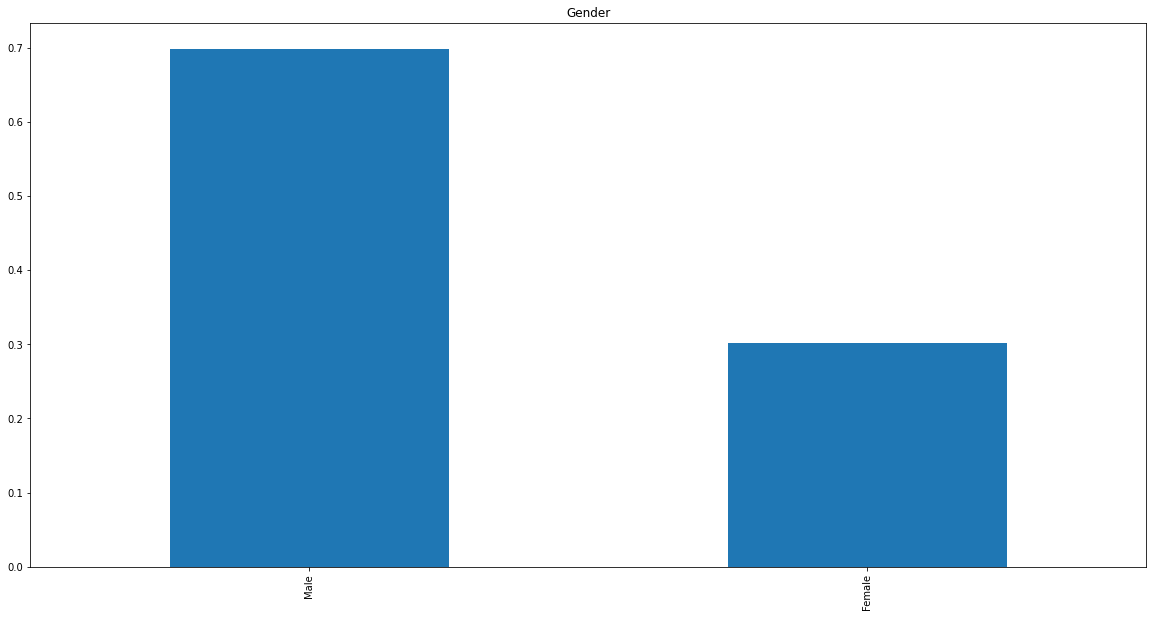

In [ ]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()

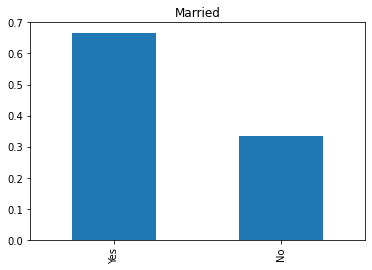

In [ ]:
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()

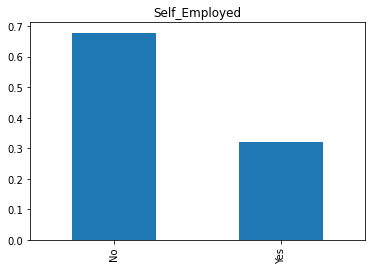

In [ ]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()

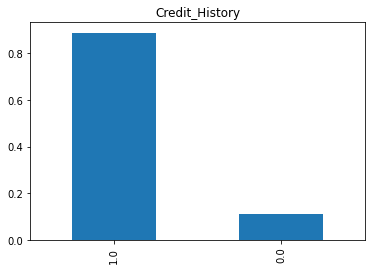

In [ ]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

# Independent Variable (Ordinal)

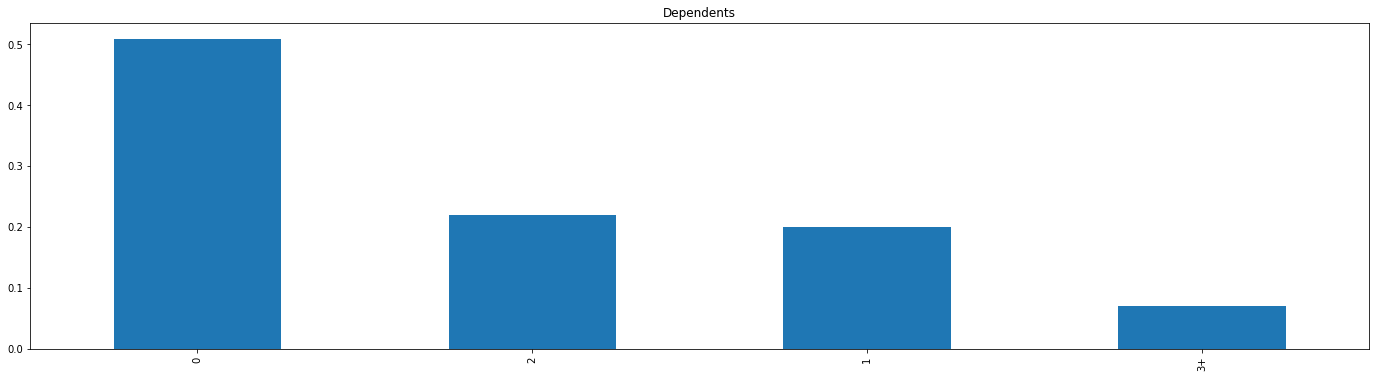

In [ ]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()

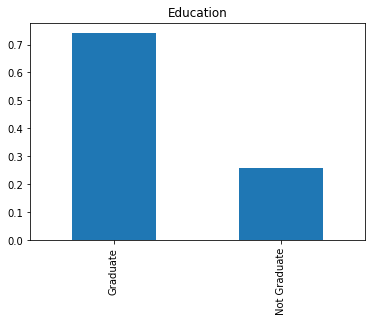

In [ ]:
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()

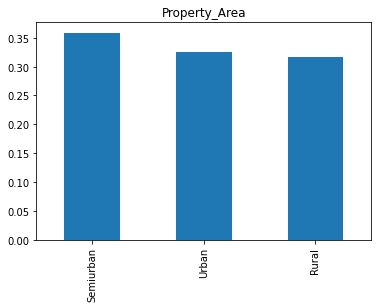

In [ ]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

# Independent Variable (Numerical)

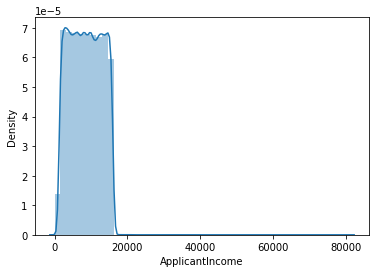

In [ ]:
sns.distplot(train['ApplicantIncome'])
plt.show()

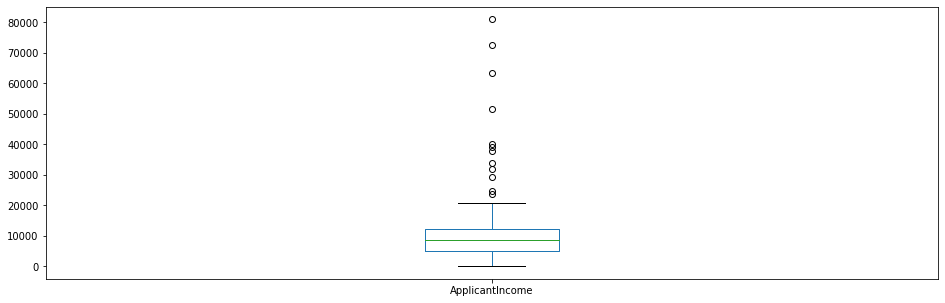

In [ ]:
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

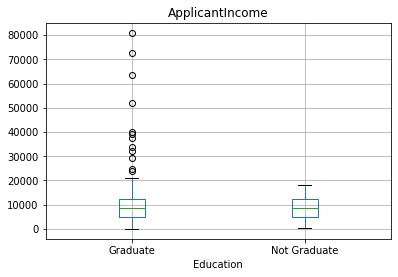

In [ ]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

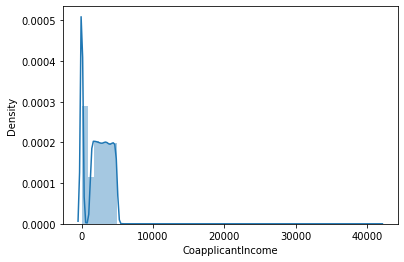

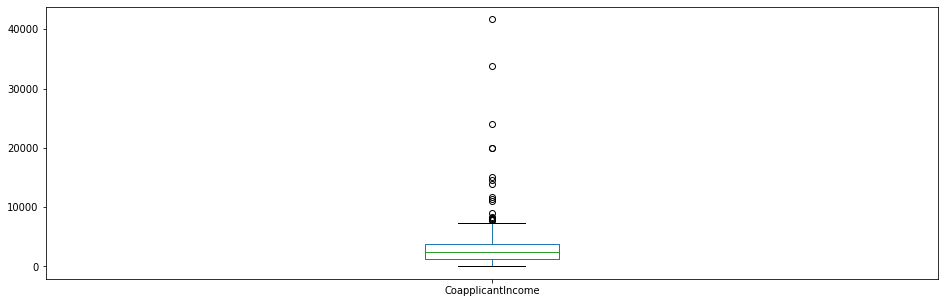

In [ ]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

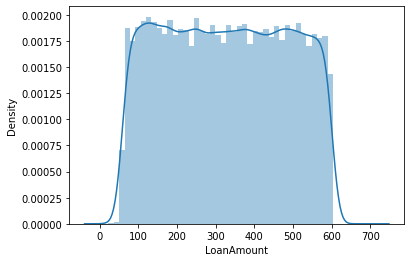

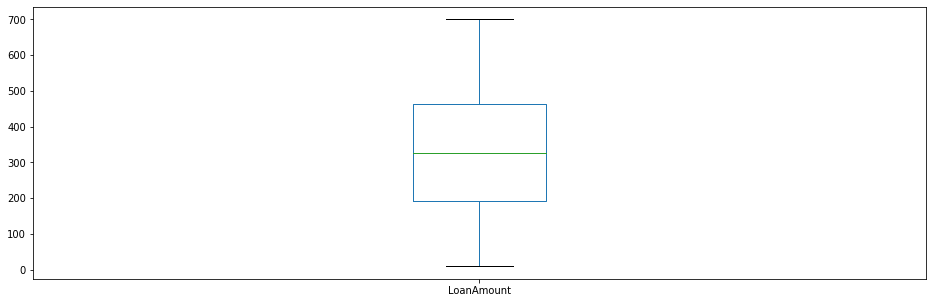

In [ ]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

# BIVARIATE ANALYSIS

# Categorical Independent Variable vs Target Variable

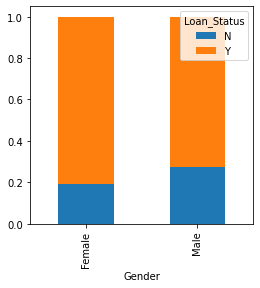

In [ ]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

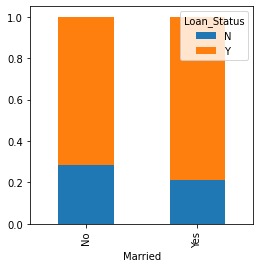

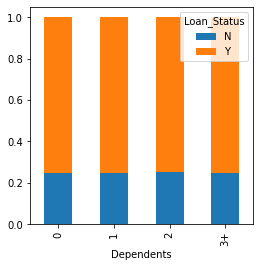

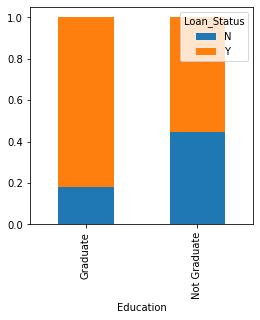

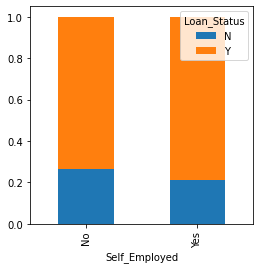

In [ ]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

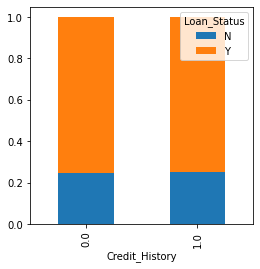

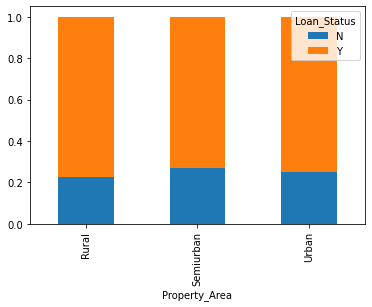

In [ ]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

#  Numerical Independent Variable vs Target Variable

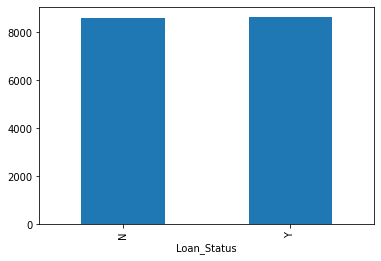

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

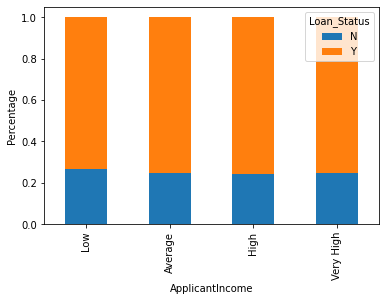

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

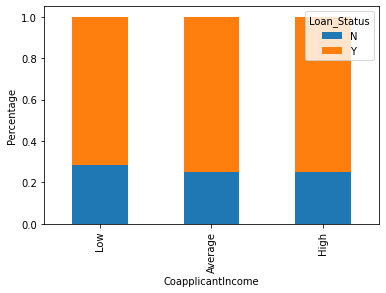

In [ ]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

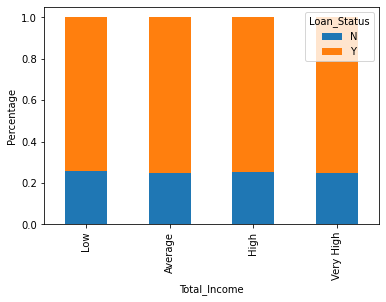

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

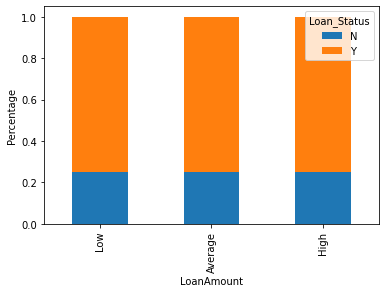

In [ ]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [ ]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

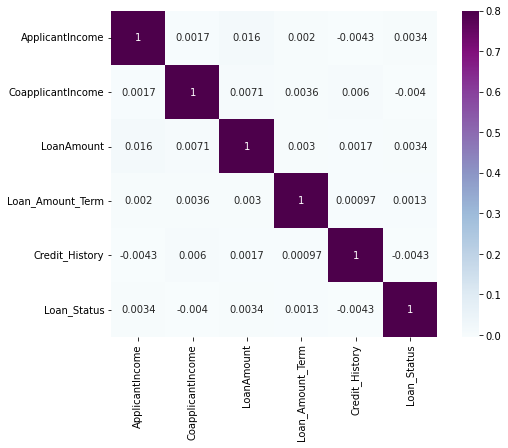

In [ ]:
# correlation between all the numerical variables (heat map to visualize the correlation)
# variables with darker color means their correlation is more
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

# Missing value imputation

In [ ]:
train.isnull().sum()

Loan_ID                 0
Gender                 24
Married              4484
Dependents             25
Education               0
Self_Employed        3281
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             27
Loan_Amount_Term       20
Credit_History         79
Property_Area           0
Loan_Status             0
dtype: int64

In [ ]:
# mode of the features

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [ ]:
train['Loan_Amount_Term'].value_counts()

360.0    74776
240.0     3528
180.0     3521
120.0     3492
480.0     2604
300.0       20
84.0         7
36.0         3
60.0         3
12.0         2
6.0          1
350.0        1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# missing values in TEST dataset

test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Outlier Treatment 

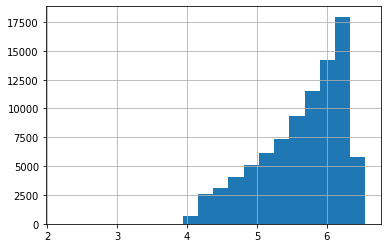

In [ ]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

# Model Building

In [ ]:
# Logistic Regression which is used for predicting binary outcome.
# drop the Loan_ID variable as it does not have any effect on the loan status
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [ ]:
# Sklearn requires the target variable in a separate dataset. 
#So, we drop our target variable from the training dataset and save it in another dataset.
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [ ]:
# dummy variables for the categorical variables
#dummy variable turns categorical variables into a series of 0 and 1
# logistic regression takes only the numerical values as input
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
# train the model on the training dataset and make predictions for the test dataset
# the train_test_split function from sklearn used to divide our train dataset
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [ ]:
print(test)

       ApplicantIncome  ...  Property_Area_Urban
0                 2600  ...                    0
1                 3365  ...                    0
2                 3717  ...                    0
3                 9560  ...                    0
4                 2799  ...                    0
...                ...  ...                  ...
14980             7240  ...                    0
14981            10952  ...                    1
14982             5178  ...                    1
14983             2541  ...                    0
14984            14677  ...                    0

[14985 rows x 21 columns]


In [ ]:
print(x_train)
print(x_cv)
print(y_train)
print(y_cv)

       ApplicantIncome  ...  Property_Area_Urban
48701            14390  ...                    1
33352            11356  ...                    0
45177            15216  ...                    0
68263             7411  ...                    0
49389             2449  ...                    1
...                ...  ...                  ...
42107             2007  ...                    0
71377            15435  ...                    0
52367             9368  ...                    1
67452             2023  ...                    0
65246             3715  ...                    0

[61584 rows x 21 columns]
       ApplicantIncome  ...  Property_Area_Urban
74662             2215  ...                    0
5849              2234  ...                    1
51766            10163  ...                    1
18098             6436  ...                    1
85598             5335  ...                    0
...                ...  ...                  ...
76028             2701  ...               

# Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7503978176858377

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix : \n ",confusion_matrix(y_cv,pred_cv))
print("\n")
print("Accuracy :",accuracy_score(y_cv,pred_cv)*100)
print("\n")
print("Report :", classification_report(y_cv,pred_cv))

Confusion matrix : 
  [[   50  6533]
 [   55 19756]]


Accuracy : 75.03978176858377


Report :               precision    recall  f1-score   support

           0       0.48      0.01      0.01      6583
           1       0.75      1.00      0.86     19811

    accuracy                           0.75     26394
   macro avg       0.61      0.50      0.44     26394
weighted avg       0.68      0.75      0.65     26394



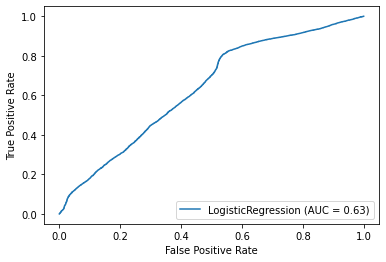

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,x_cv,y_cv)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predict_cv = model.predict(x_cv)
accuracy_score(y_cv,predict_cv)

0.7503978176858377

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix : \n ",confusion_matrix(y_cv,predict_cv))
print("\n")
print("Accuracy :",accuracy_score(y_cv,predict_cv)*100)
print("\n")
print("Report :", classification_report(y_cv,predict_cv))

Confusion matrix : 
  [[   50  6533]
 [   55 19756]]


Accuracy : 75.03978176858377


Report :               precision    recall  f1-score   support

           0       0.48      0.01      0.01      6583
           1       0.75      1.00      0.86     19811

    accuracy                           0.75     26394
   macro avg       0.61      0.50      0.44     26394
weighted avg       0.68      0.75      0.65     26394



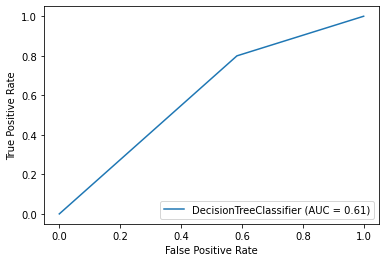

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,x_cv,y_cv)

# Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
models = GaussianNB()
models.fit(x_train, y_train)
predictions = models.predict(x_cv)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix : \n ",confusion_matrix(y_cv,predictions))
print("\n")
print("Accuracy :",accuracy_score(y_cv,predictions)*100)
print("\n")
print("Report :", classification_report(y_cv,predictions))

Confusion matrix : 
  [[ 3043  3540]
 [ 3858 15953]]


Accuracy : 71.97090247783588


Report :               precision    recall  f1-score   support

           0       0.44      0.46      0.45      6583
           1       0.82      0.81      0.81     19811

    accuracy                           0.72     26394
   macro avg       0.63      0.63      0.63     26394
weighted avg       0.72      0.72      0.72     26394



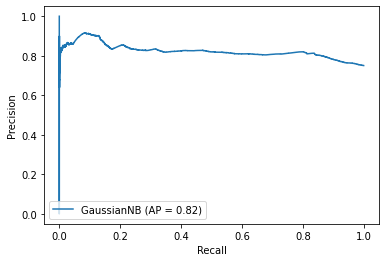

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(models,x_cv,y_cv)

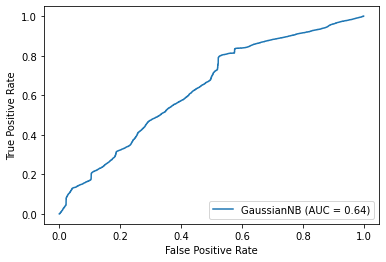

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(models,x_cv,y_cv)

In [ ]:
pred_test = model.predict(test)
print(pred_test)

[1 1 1 ... 1 1 1]


In [ ]:
# submission of new data frame which is empty initially
submission_v=pd.DataFrame()   

In [ ]:
submission_v['Loan_ID']=test_original1['Loan_ID']
submission_v['Loan_Status']=pred_test

In [ ]:
submission_v['Loan_Status'].replace(0, 'N', inplace=True)
submission_v['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
submission_v.to_csv('submission_j_logistic_regression.csv',header=True,index=False)

In [ ]:
result=pd.read_csv('submission_j_logistic_regression.csv')

In [ ]:
result.head()

,Loan_ID,Loan_Status
0,LP0138569,Y
1,LP0114279,Y
2,LP0127727,Y
3,LP0122697,Y
4,LP0118029,Y


In [ ]:
import pickle
model.fit(x_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result1 = loaded_model.score(x_cv, y_cv)

In [ ]:
print(result1)

0.7503978176858377


# Feature Engineering

In [ ]:
# If the total income is high, the chances of loan approval might also be high
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [ ]:
# distribution of TI
sns.distplot(train['Total_Income'])

In [ ]:
# it is shifted towards left, i.e., the distribution is right-skewed
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])
# distribution looks much closer to normal

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])                    # distribution

In [ ]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [ ]:
# we can drop this variable which we used to create these new features

# train=train.drop([‘ApplicantIncome’, ‘CoapplicantIncome’, ‘LoanAmount’, ‘Loan_Amount_Term’], axis=1)
#test=test.drop([‘ApplicantIncome’, ‘CoapplicantIncome’, ‘LoanAmount’, ‘Loan_Amount_Term’], axis=1)